<a href="https://colab.research.google.com/github/kilianodonell-cmd/Crop-_Statistics-/blob/main/notebooks/01_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 – Data loading

Purpose:
- load raw data
- initial inspection
- basic cleaning



In [34]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [35]:


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df_1 = pd.read_csv("../content/drive/MyDrive/Data_Mastery/data/gaza_fieldwork_crop_covers.csv")

df_1.head()

,id,formid,plotid,enumerator_id,gid,report_close_time,total_crop_cover,crop_po,crop_cover_percentage
0,820,20,9624988,1,18418,2025-04-10 12:06:32.653,80,feijões,30
1,820,20,9624988,1,18418,2025-04-10 12:06:32.653,80,milho,50
2,821,20,12364565,2,9045,2025-04-10 12:06:45.057,100,trigo,100
3,821,20,12364565,2,9058,2025-04-10 12:06:45.057,100,batata doce de polpa alaranjada,100
4,821,20,12364565,2,9065,2025-04-10 12:06:45.057,100,feijões,100


In [37]:
gdf_sam = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_sampling_areas.shp")

gdf_sam.head()

,plotid,optional,prov,stratum,fcname,geometry
0,10084432.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((503500 7216000, 503500 7216500, 5040..."
1,12014580.0,1,Gaza,scarce alluvial,scarce,"POLYGON ((600000 7290000, 600000 7290500, 6005..."
2,10264592.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((512500 7296000, 512500 7296500, 5130..."
3,7015055.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((350000 7527500, 350000 7528000, 3505..."
4,9884543.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((493500 7271500, 493500 7272000, 4940..."


In [38]:
missing_plotids = sorted(
    set(df_1["plotid"].unique())
    - set(gdf_sam["plotid"].unique())
)

missing_plotids


[]

In [39]:
missing_plotids = sorted(
  set(gdf_sam["plotid"].unique())
   - set(df_1["plotid"].unique())

)

missing_plotids


[np.float64(6975045.0),
 np.float64(6994897.0),
 np.float64(7015055.0),
 np.float64(7035055.0),
 np.float64(7155097.0),
 np.float64(7275020.0),
 np.float64(7494842.0),
 np.float64(7744825.0),
 np.float64(7784866.0),
 np.float64(7874793.0),
 np.float64(7894767.0),
 np.float64(7954783.0),
 np.float64(8144868.0),
 np.float64(8164864.0),
 np.float64(8205137.0),
 np.float64(8234973.0),
 np.float64(8334712.0),
 np.float64(8354714.0),
 np.float64(8504703.0),
 np.float64(8514772.0),
 np.float64(8734827.0),
 np.float64(8744647.0),
 np.float64(8954774.0),
 np.float64(8985043.0),
 np.float64(9024738.0),
 np.float64(9134725.0),
 np.float64(9185144.0),
 np.float64(9495244.0),
 np.float64(9534651.0),
 np.float64(9555059.0),
 np.float64(9715241.0),
 np.float64(9754786.0),
 np.float64(9864553.0),
 np.float64(9864618.0),
 np.float64(9884543.0),
 np.float64(9904539.0),
 np.float64(10004537.0),
 np.float64(10084432.0),
 np.float64(10264438.0),
 np.float64(10264592.0),
 np.float64(10274416.0),
 np.float64

In [40]:
print(gdf_sam.columns)

Index(['plotid', 'optional', 'prov', 'stratum', 'fcname', 'geometry'], dtype='object')


In [41]:
print(gdf_sam["fcname"].unique())

['scarce' 'regular' 'irrigated']


In [42]:
print(gdf_sam["optional"].unique())

[0 1 2]


In [43]:
gdf_seg = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_segments.shp")

gdf_seg.head()

,gid,id,plotid,landform_e,landform_p,farming_ty,farming__1,profile,optional,cuo_class_,cuo_clas_1,segment_cl,segment__1,code,tasked,district,areasize_w,geometry
0,24063,23663,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,open woodland,floresta aberta,205,NaN,Bilene,0.0,"POLYGON ((534750 7248011.259, 534750 7248250.0..."
1,24017,23625,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,cultivated,terra cultivada,agricultural field,campo agrícola,301,NaN,Bilene,0.0,"POLYGON ((535235.705 7247274.049, 535236.34 72..."
2,24016,23624,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,cultivated,terra cultivada,agricultural field,campo agrícola,301,NaN,Bilene,0.0,"POLYGON ((535452.472 7248230.195, 535463.051 7..."
3,24011,23621,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,other,outro,208,NaN,Bilene,0.0,"POLYGON ((535692.434 7247897.073, 535710.954 7..."
4,24009,23619,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,other,outro,208,NaN,Bilene,0.0,"POLYGON ((535596.353 7248121.187, 535590.474 7..."


In [44]:
missing_plotids = sorted(
    set(df_1["plotid"].unique())
    - set(gdf_seg["plotid"].unique())
)

missing_plotids


[]

In [45]:
missing_plotids = sorted(
    set(gdf_seg["plotid"].unique())
    - set(df_1["plotid"].unique())
)

len(missing_plotids)


103

In [46]:
print(gdf_seg.columns)

Index(['gid', 'id', 'plotid', 'landform_e', 'landform_p', 'farming_ty',
       'farming__1', 'profile', 'optional', 'cuo_class_', 'cuo_clas_1',
       'segment_cl', 'segment__1', 'code', 'tasked', 'district', 'areasize_w',
       'geometry'],
      dtype='object')


In [89]:
gdf_seg["district"].unique()

array(['Bilene', 'Xai-Xai', 'Mandlakaze', 'Chibuto', 'Chokwe',
       'Chicualacuala_Black', 'Guija', 'Massingir', 'Mabalane', 'Chigubo',
       'Chicualacuala', 'Massangena', 'Cidade de Xai-Xai'], dtype=object)

In [48]:
for col in gdf_seg.columns:
    print(col)
    print(gdf_seg[col].unique())
    print("------")


gid
[24063 24017 24016 ... 18082 18031 18088]
------
id
[23663 23625 23624 ... 17729 17731 17736]
------
plotid
[10714495 10474489 10944477 12034499 12194524 11614572 10294521 10294468
 12734545 11004454 11104448  7644979 10824574 10784529 11164473  8234973
 10734673  9534651  8514772  9024738 10244478  8734827 11184541  9504638
 10084432 10694677 10884738 10484564 10784479 11034460 11034521  9884543
  9864618 11514703  9754786 10624485  9594616 11784584 10354511  8744647
  8205137 10274416  8164864 11074511 10734683  9185144 10314505 10154468
  6994897 10734525 10204588 10894432  9715241  6975045 11054454 11184525
 11384487  8634655 11774475 10264438  7744825 10764446  7275020  9134725
 11434481 12014580  7035055 11114719  9624988 10325175  8354714 11024497
 10244521  8504703 11944595 10564416 11104444 10974726 11774738 11794734
 11444651  7894767 10374458 12034495 11074550  9495244 11094515  7015055
 10684677 10314574  9555059 10584515 10294501 10624511 11324527 10624422
  7784866  8

In [49]:
gdf_stra = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_strata.shp")

gdf_stra.head()

,id,province_i,province,cluster,stratum,fcname,landform,geometry
0,41,2,Gaza,q03a,5 late pedi,regular,pediplain,"MULTIPOLYGON (((521420.02 7201748.95, 521372.0..."
1,42,2,Gaza,q03b,8 late pedi,regular,pediplain,"MULTIPOLYGON (((521429.52 7202601.43, 521564.2..."
2,44,2,Gaza,q03c,11 late pedi,regular,pediplain,"MULTIPOLYGON (((525552.176 7211794.603, 525634..."
3,45,2,Gaza,q19,12 late pedi,regular,pediplain,"MULTIPOLYGON (((524569.02 7212062.67, 524569.0..."
4,54,2,Gaza,q16a,7 early pedi,regular,pediplain,"MULTIPOLYGON (((507665.229 7247408.124, 506763..."


In [50]:
gdf_stra["id"].nunique()

37

In [51]:
gdf_stra[gdf_stra["province"] == "Gaza"]["stratum"].nunique()

27

In [52]:
print(gdf_seg.geom_type.unique())


['Polygon']


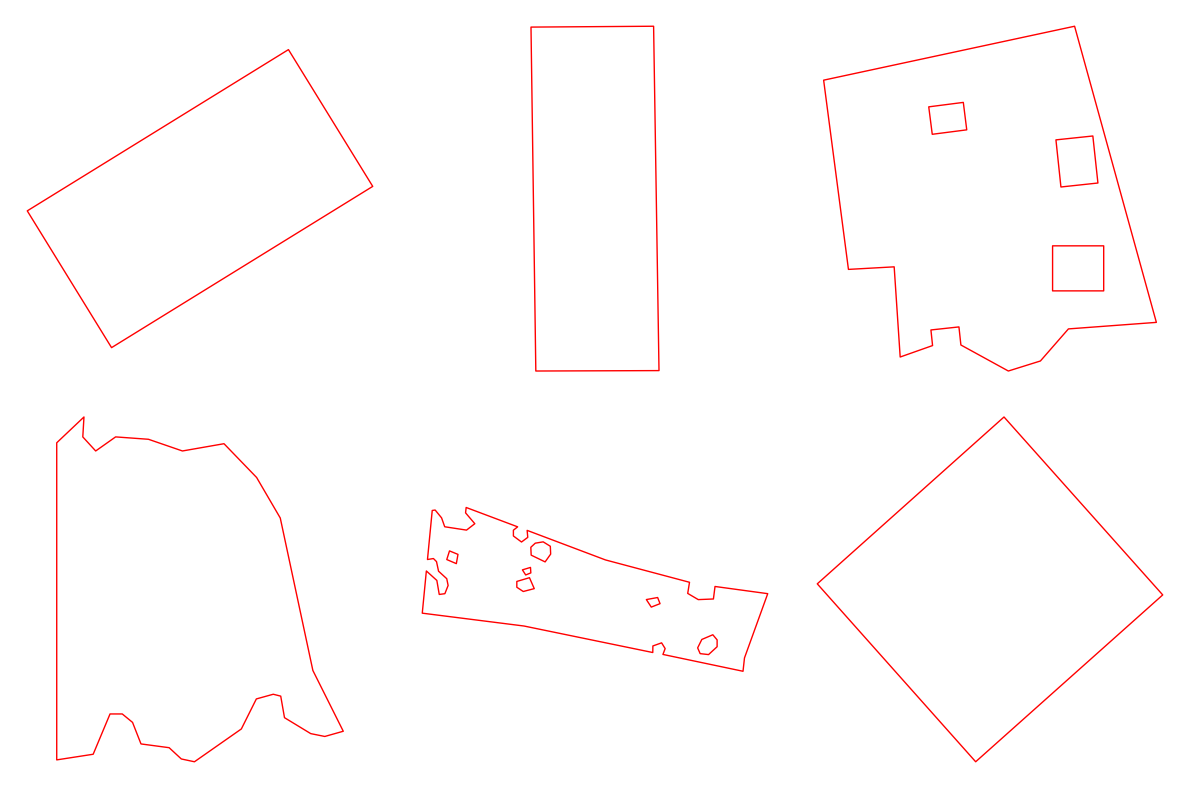

In [53]:
# sample 6 random polygons
sampled = gdf_seg.sample(6)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, (_, row) in zip(axes.flatten(), sampled.iterrows()):
    gdf_seg.iloc[[row.name]].plot(
        ax=ax,
        facecolor="none",
        edgecolor="red"
    )
    ax.set_axis_off()

plt.tight_layout()
plt.show()


In [54]:
gdf_seg[gdf_seg["plotid"].isin(gdf_sam["plotid"])].groupby("plotid").size()


,0
plotid,
6975045,2
6994897,3
7015055,132
7035055,16
7155097,241
...,...
12194485,942
12194524,96
12204477,154


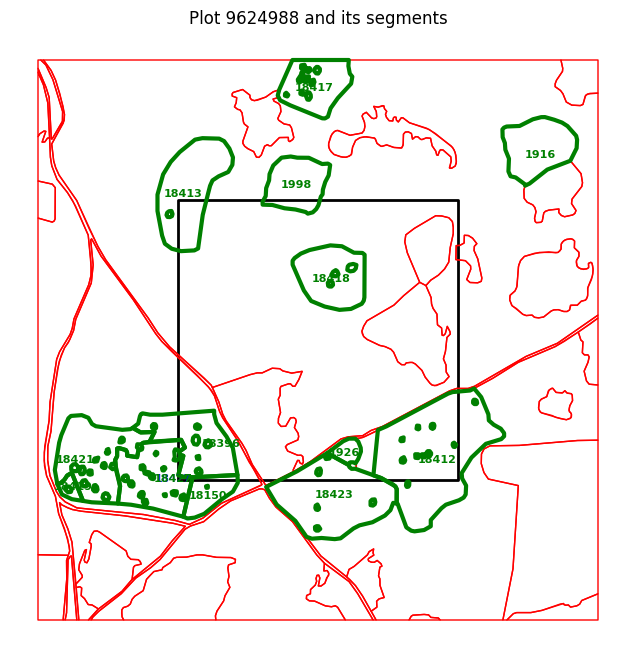

[18427, 18423, 18421, 18418, 18417, 18410, 18409, 18412, 18413, 18406, 18407, 18396, 18419, 1900, 2008, 1957, 1956, 1923, 1922, 1731, 2003, 2002, 2001, 2000, 1999, 1998, 2006, 2005, 2004, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1967, 1966, 1965, 1963, 1962, 1961, 1960, 1959, 1958, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1942, 1941, 1940, 1987, 1954, 1953, 1939, 1938, 1937, 1936, 1952, 1932, 1931, 1930, 1929, 1928, 1964, 1935, 1934, 1933, 1926, 1943, 1925, 1924, 1916, 1894, 1955, 1917, 1890, 1906, 1868, 1851, 2007, 18150]


In [55]:
#lot_id = gdf_sam["plotid"].iloc[1]
plot_id= 9624988
sam_plot = gdf_sam[gdf_sam["plotid"] == plot_id]
seg_plot = gdf_seg[gdf_seg["plotid"] == plot_id]


fig, ax = plt.subplots(figsize=(8, 8))

# plot main plot polygon
sam_plot.plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linewidth=2,
    label="Plot"
)

# plot segments inside
seg_plot.plot(
    ax=ax,
    facecolor="none",
    edgecolor="red",
    linewidth=1,
    label="Segments"
)

# add segment label
for _, row in seg_plot[seg_plot["gid"] == 18427].iterrows():
    x, y = row.geometry.representative_point().coords[0]
    ax.text(
        x, y,
        str(row["gid"]),
        fontsize=8,
        color="blue",
        ha="center",
        va="center"
    )

highlight_gid = [18427, 18423, 18421, 18418, 18417, 18412, 18413, 18396, 18419, 1998, 1926, 1916, 18150]

# Plot highlighted segment boundaries in green
seg_plot[seg_plot["gid"].isin(highlight_gid)].plot(
    ax=ax,
    facecolor="none",
    edgecolor="green",
    linewidth=3,
    label="Highlighted segments"
)

# Add gid labels for highlighted segments
for _, row in seg_plot[seg_plot["gid"].isin(highlight_gid)].iterrows():
    x, y = row.geometry.representative_point().coords[0]
    ax.text(
        x, y,
        str(row["gid"]),
        fontsize=8,
        color="green",
        ha="center",
        va="center",
        fontweight="bold"
    )



ax.set_title(f"Plot {plot_id} and its segments")
ax.set_axis_off()

plt.show()

gid_list = seg_plot["gid"].tolist()
print(gid_list)


In [56]:
## what?
gdf_gz = gdf_seg[gdf_seg["gid"].isin(df_1["gid"])].copy()
print("segments_ids:", gdf_gz["gid"].nunique())
print("sampling area_ids:", gdf_gz["plotid"].nunique())


segments_ids: 1071
sampling area_ids: 46


In [57]:
gdf_gz.head()

,gid,id,plotid,landform_e,landform_p,farming_ty,farming__1,profile,optional,cuo_class_,cuo_clas_1,segment_cl,segment__1,code,tasked,district,areasize_w,geometry
596,18178,17823,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,3.0,Xai-Xai,152.986671,"POLYGON ((546509.027 7238486.318, 546514.338 7..."
603,18170,17816,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,uncultivated,terra no cultivada,open woodland,floresta aberta,205,2.0,Xai-Xai,8922.510025,"POLYGON ((546884.485 7238949.864, 546889.606 7..."
608,18161,17813,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,3.0,Xai-Xai,4960.516669,"POLYGON ((546773.043 7238759.732, 546779.161 7..."
638,618,297,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,2.0,Xai-Xai,1.368582,"POLYGON ((546977.894 7238448.186, 546982.364 7..."
666,544,228,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,3.0,Xai-Xai,862.446178,"POLYGON ((546890.909 7238729.339, 546901.175 7..."


In [58]:
relations = pd.DataFrame({
    "rows": [
        len(gdf_gz),
        gdf_gz["plotid"].nunique(),
        gdf_gz["id"].nunique(),
        gdf_gz["gid"].nunique()
    ]
}, index=[
    "total rows",
    "unique plotid",
    "unique id",
    "unique gid"
])

print(relations)


               rows
total rows     1071
unique plotid    46
unique id      1071
unique gid     1071


In [59]:
relations_df1 = pd.DataFrame({
    "rows": [
        len(df_1),
        df_1["plotid"].nunique(),
        df_1["id"].nunique(),
        df_1["gid"].nunique()
    ]
}, index=[
    "total rows",
    "unique plotid",
    "unique id",
    "unique gid"
])

print(relations_df1)


               rows
total rows     1837
unique plotid    46
unique id       127
unique gid     1071


In [60]:
gdf_gz["profile"].nunique()

22

In [61]:
all_profiles = set(gdf_seg["profile"].unique())
gdf_profiles = set(gdf_gz["profile"].unique())

#sorted(all_profiles - visited_profiles)


In [62]:
missing_gids = gdf_seg.loc[
    ~gdf_seg["gid"].isin(df_1["gid"]),
    "gid"
].unique()

missing_gids


array([24063, 24017, 24016, ..., 18082, 18031, 18088])

In [63]:
gdf_seg.loc[
    gdf_seg["gid"].isin(missing_gids),
    ["gid", "plotid", "profile"]
].sort_values(["profile", "plotid"])


,gid,plotid,profile
31961,14592,10134470,10 early pedi
31962,14584,10134470,10 early pedi
31963,20498,10134470,10 early pedi
31964,20491,10134470,10 early pedi
31965,20490,10134470,10 early pedi
...,...,...,...
4796,30868,8514772,scarce western pedi
4797,30877,8514772,scarce western pedi
4798,30876,8514772,scarce western pedi
4799,30871,8514772,scarce western pedi


In [96]:
# for checking whether gdf_gz contains all segments or only visited & cultivated ones
segments_per_sa = (
    gdf_gz
    .groupby("plotid", as_index=False)["gid"]
    .nunique()
    .rename(columns={"gid": "n_segments"})
)

#print(segments_per_sa)

segments_check = (
    gdf_seg
    .groupby("plotid", as_index=False)["gid"]
    .nunique()
    .rename(columns={"gid":"segments_all"})
)

#print(segments_check)

13

In [104]:
gdf_seg["district"].unique()

array(['Bilene', 'Xai-Xai', 'Mandlakaze', 'Chibuto', 'Chokwe',
       'Chicualacuala_Black', 'Guija', 'Massingir', 'Mabalane', 'Chigubo',
       'Chicualacuala', 'Massangena', 'Cidade de Xai-Xai'], dtype=object)

In [102]:
gdf_gz["district"].nunique()

10

In [93]:
gdf_districts = gpd.read_file("../content/drive/MyDrive/Data_Mastery/data/shapefiles/moz_districts.shp")
print(gdf_districts)


     id           distrito provincia  \
0   245             Bilene      Gaza   
1   234            Chibuto      Gaza   
2   239      Chicualacuala      Gaza   
3   237            Chigubo      Gaza   
4   235             Chokwe      Gaza   
5   257  Cidade de Xai-Xai      Gaza   
6   233              Guija      Gaza   
7   240           Mabalane      Gaza   
8   255         Mandlakaze      Gaza   
9   246         Massangena      Gaza   
10  231          Massingir      Gaza   
11  254            Xai-Xai      Gaza   

                                             geometry  
0   POLYGON ((532097.573 7214125.683, 532050.89 72...  
1   POLYGON ((584811.374 7276535.453, 584220.059 7...  
2   POLYGON ((426324.548 7424471.797, 426364.262 7...  
3   POLYGON ((575761.32 7446613.826, 575911.731 74...  
4   POLYGON ((520960.775 7274858.993, 521180.785 7...  
5   POLYGON ((562930.7 7236477.437, 562936.87 7236...  
6   POLYGON ((505491.567 7287528.412, 505278.671 7...  
7   POLYGON ((501586.373 738691

## Formula 1

In [65]:
#cp=visited segment for a particular crop


cp = df_1.merge(
    gdf_gz[["gid", "areasize_w", "optional"]],
    on="gid",
    how="left"
)

cp["crop_cover"] = np.where(
    cp["optional"].isin([0, 2]),
    cp["areasize_w"] * (cp["total_crop_cover"] / 100) * (cp["crop_cover_percentage"] / 100),
    0
)
print(cp.head())

    id  formid    plotid  enumerator_id    gid        report_close_time  \
0  820      20   9624988              1  18418  2025-04-10 12:06:32.653   
1  820      20   9624988              1  18418  2025-04-10 12:06:32.653   
2  821      20  12364565              2   9045  2025-04-10 12:06:45.057   
3  821      20  12364565              2   9058  2025-04-10 12:06:45.057   
4  821      20  12364565              2   9065  2025-04-10 12:06:45.057   

   total_crop_cover                          crop_po  crop_cover_percentage  \
0                80                          feijões                     30   
1                80                            milho                     50   
2               100                            trigo                    100   
3               100  batata doce de polpa alaranjada                    100   
4               100                          feijões                    100   

     areasize_w  optional   crop_cover  
0  11374.813650         0  2729.9

In [66]:
cp["crop_cover"].describe()


,crop_cover
count,1837.000000
mean,1251.963897
std,3036.985986
min,0.000000
25%,83.529160
50%,398.191309
75%,1131.205972
max,62272.796734





## Formula 2

In [67]:
#sa_cp = observed crop area of a particular crop for each SA using only the visited segments
sa_cp = (
    cp.groupby(["plotid", "crop_po"])["crop_cover"]
      .sum()
      .reset_index(name="cover_area")
)
print(sa_cp.head())

    plotid   crop_po    cover_area
0  7644979   abóbora   2546.707067
1  7644979   feijões    608.909714
2  7644979    mapira   1620.692235
3  7644979  mexoeira   4470.740775
4  7644979     milho  54061.913867


In [68]:
# checking specific plot and crop
sa_cp_plot = sa_cp[
    (sa_cp["plotid"] == 9624988) &
    (sa_cp["crop_po"] == "feijões")
]

print(sa_cp_plot)


     plotid  crop_po   cover_area
39  9624988  feijões  2729.955276


## Formula 3

In [112]:
## GDF_GZ ONLY CONTAINS THE VISITED AND CULTIVATED ONES!!!!
gdf_cult = gdf_gz[gdf_gz["cuo_class_"] == "cultivated"]

# Sum cultivated area per sampling area (plotid)
sa_cult = (
    gdf_cult
    .groupby("plotid", as_index=False)["areasize_w"]
    .sum()
    .rename(columns={"areasize_w": "sa_cult"})
)

print(sa_cult.head(8))

    plotid        sa_cult
0  7644979  100452.880431
1  8104969     236.073184
2  8634655    3986.050946
3  9064730   47825.220631
4  9244675   50142.457309
5  9504638  101916.051111
6  9594616     437.320165
7  9624988   11374.813650


In [114]:
# cultivated areas using all segments (gdf_seg)

gdf_cult2 = gdf_seg[gdf_seg["cuo_class_"] == "cultivated"]

sa_cult2 = (gdf_cult2
    .groupby("plotid", as_index=False)["areasize_w"]
    .sum()
    .rename(columns={"areasize_w": "sa_cult2"})
)

print(sa_cult2.head(8))

    plotid       sa_cult2
0  7015055   70613.434551
1  7155097  116802.647230
2  7644979  118460.836291
3  8104969     478.839229
4  8205137  156468.642569
5  8334712   16255.823615
6  8354714  167480.239045
7  8504703       0.000000


## Formula 4

In [115]:
# ---------- helper: visited total segment area per SA (denominator in F4) ----------
sa_visited_area = (
    gdf_gz
    .loc[
        (gdf_gz["cuo_class_"] == "cultivated") &
        (gdf_gz["optional"].isin([0, 2]))
    ]
    .groupby("plotid", as_index=False)["areasize_w"]
    .sum()
    .rename(columns={"areasize_w": "sa_visited_area"})
)


In [119]:
## i have here now sa_cp1 becuase the old formula that we had done yesterday is using cp

sa_cp1 = (
    sa_cp.merge(sa_cult, on="plotid", how="left")
         .merge(sa_visited_area, on="plotid", how="left")
)
sa_cp1["Ak_j"]= (
    sa_cp1["cover_area"]
    * sa_cp1["sa_cult"]
    / sa_cp1["sa_visited_area"]
)
sa_cp1

,plotid,crop_po,cover_area,a,sa_cult,sa_visited_area,Ak_j
0,7644979,abóbora,2546.707067,2209.349238,100452.880431,100452.880431,2546.707067
1,7644979,feijões,608.909714,528.248510,100452.880431,100452.880431,608.909714
2,7644979,mapira,1620.692235,1406.001970,100452.880431,100452.880431,1620.692235
3,7644979,mexoeira,4470.740775,3878.509568,100452.880431,100452.880431,4470.740775
4,7644979,milho,54061.913867,46900.426738,100452.880431,100452.880431,54061.913867
...,...,...,...,...,...,...,...
196,12364565,batata doce de polpa alaranjada,1115.380969,890.872216,49233.435799,49233.435799,1115.380969
197,12364565,feijões,1862.903969,1487.930521,49233.435799,49233.435799,1862.903969
198,12364565,mexoeira,3730.725984,2979.789162,49233.435799,49233.435799,3730.725984
199,12364565,milho,3632.925278,2901.674210,49233.435799,49233.435799,3632.925278


In [120]:
# formula 4 different approach using gid from fieldwork file

# Step 1: unique visited segment gids per plotid from df_1
visited_gids = df_1[["plotid", "gid"]].drop_duplicates()

# Step 2: attach segment areas from gdf_seg
visited_gids = visited_gids.merge(
    gdf_seg[["gid", "areasize_w"]],
    on="gid",
    how="left"
)

# Step 3: sum visited segment area per sampling area
sa_visited_area1 = (
    visited_gids
    .groupby("plotid", as_index=False)["areasize_w"]
    .sum()
    .rename(columns={"areasize_w": "sa_visited_area"})
)


In [123]:
sa_cp123 = (
    sa_cp.merge(sa_cult2, on="plotid", how="left")
         .merge(sa_visited_area1, on="plotid", how="left")
)

sa_cp123["Ak_j"]= (
    sa_cp123["cover_area"]
    * sa_cp123["sa_cult2"]
    / sa_cp123["sa_visited_area"]
)
sa_cp123

,plotid,crop_po,cover_area,a,sa_cult2,sa_visited_area,Ak_j
0,7644979,abóbora,2546.707067,2209.349238,118460.836291,115791.589698,2605.414173
1,7644979,feijões,608.909714,528.248510,118460.836291,115791.589698,622.946400
2,7644979,mapira,1620.692235,1406.001970,118460.836291,115791.589698,1658.052696
3,7644979,mexoeira,4470.740775,3878.509568,118460.836291,115791.589698,4573.801020
4,7644979,milho,54061.913867,46900.426738,118460.836291,115791.589698,55308.157914
...,...,...,...,...,...,...,...
196,12364565,batata doce de polpa alaranjada,1115.380969,890.872216,73617.084895,61640.756505,1332.090976
197,12364565,feijões,1862.903969,1487.930521,73617.084895,61640.756505,2224.851988
198,12364565,mexoeira,3730.725984,2979.789162,73617.084895,61640.756505,4455.577560
199,12364565,milho,3632.925278,2901.674210,73617.084895,61640.756505,4338.774924


## below are the F4 trys from yesterday

In [74]:
a = (
    sa_cp["cover_area"]
    * sa_cult.set_index("plotid")["sa_cult"].reindex(sa_cp["plotid"]).values
    / gdf_gz[gdf_gz["optional"].isin([0, 2])]
        .groupby("plotid")["areasize_w"]
        .sum()
        .reindex(sa_cp["plotid"])
        .values
)

sa_cp["a"] = a
sa_cp

,plotid,crop_po,cover_area,a
0,7644979,abóbora,2546.707067,2209.349238
1,7644979,feijões,608.909714,528.248510
2,7644979,mapira,1620.692235,1406.001970
3,7644979,mexoeira,4470.740775,3878.509568
4,7644979,milho,54061.913867,46900.426738
...,...,...,...,...
196,12364565,batata doce de polpa alaranjada,1115.380969,890.872216
197,12364565,feijões,1862.903969,1487.930521
198,12364565,mexoeira,3730.725984,2979.789162
199,12364565,milho,3632.925278,2901.674210


In [75]:
cult = sa_cp["plotid"].map(sa_cult.set_index("plotid")["sa_cult"])
den  = sa_cp["plotid"].map(
    gdf_gz[gdf_gz["optional"].isin([0, 2])]
    .groupby("plotid")["areasize_w"].sum()
)

sa_cp["a"] = sa_cp["cover_area"] * cult / den
sa_cp


,plotid,crop_po,cover_area,a
0,7644979,abóbora,2546.707067,2209.349238
1,7644979,feijões,608.909714,528.248510
2,7644979,mapira,1620.692235,1406.001970
3,7644979,mexoeira,4470.740775,3878.509568
4,7644979,milho,54061.913867,46900.426738
...,...,...,...,...
196,12364565,batata doce de polpa alaranjada,1115.380969,890.872216
197,12364565,feijões,1862.903969,1487.930521
198,12364565,mexoeira,3730.725984,2979.789162
199,12364565,milho,3632.925278,2901.674210


In [76]:
#Formula 4 by Pleun
# Sum areasize_w for visited segments only, per sampling area
sa_visited = (
    gdf_gz[gdf_gz["optional"].isin([0, 2])]
    .groupby("plotid", as_index=False)["areasize_w"]
    .sum()
    .rename(columns={"areasize_w": "sa_visited"})
)

# Combine and compute sa_est
sa_est = (
    sa_cp
    .merge(sa_cult, on="plotid", how="left")
    .merge(sa_visited, on="plotid", how="left")
)


sa_est["sa_est"] = (
    sa_est["cover_area"] * sa_est["sa_cult"] / sa_est["sa_visited"]
)

# Optional safety against division by zero
sa_est["sa_est"] = sa_est["sa_est"].fillna(0)

print(sa_est.head(10))

    plotid                              crop_po    cover_area             a  \
0  7644979                              abóbora   2546.707067   2209.349238   
1  7644979                              feijões    608.909714    528.248510   
2  7644979                               mapira   1620.692235   1406.001970   
3  7644979                             mexoeira   4470.740775   3878.509568   
4  7644979                                milho  54061.913867  46900.426738   
5  7644979                      outra horticola    969.774686    841.310330   
6  8104969                              abóbora   2508.434583     51.702300   
7  8104969  batata doce de polpa nāo alaranjada     81.080765      1.671187   
8  8104969                              feijões   3225.340554     66.478722   
9  8104969                               mapira    471.825274      9.724970   

         sa_cult     sa_visited        sa_est  
0  100452.880431  115791.589698   2209.349238  
1  100452.880431  115791.589698   

### Formula 5

In [77]:
##helper for F5
# ---------- add profile once (needed for F5/F6) ----------this is just adding "profile"
plotid_to_profile = (
    gdf_gz.groupby("plotid", as_index=False)["profile"].first()
)
sa_cp1 = sa_cp1.merge(plotid_to_profile, on="plotid", how="left")

In [78]:
## here again A_sj1 becuase
A_sj1 = (
    sa_cp1
    .rename(columns={"profile": "stratum"})
    .groupby(["stratum", "crop_po"], as_index=False)["Ak_j"]
    .sum()
    .rename(columns={"Ak_j": "stratum_crop_area"})
)

A_sj1



,stratum,crop_po,stratum_crop_area
0,10 early pedi,abóbora,3360.378455
1,10 early pedi,amendoim pequeno,1760.772904
2,10 early pedi,batata doce de polpa alaranjada,590.815920
3,10 early pedi,batata doce de polpa nāo alaranjada,16269.954978
4,10 early pedi,cana de açucar,2016.944770
...,...,...,...
121,scarce alluvial,batata doce de polpa alaranjada,0.000000
122,scarce alluvial,batata doce de polpa nāo alaranjada,0.000000
123,scarce alluvial,feijões,0.000000
124,scarce alluvial,mandioca,0.000000


## Formula 6

so here i have two different approaches with complete different results

In [79]:
PLOT_AREA = 500 * 500  # all sampling areas in gaza are 500 x 500m

sa_stratum_area = (
    gdf_sam[
        (gdf_sam["prov"] == "Gaza") &
        (gdf_sam["optional"].isin([0, 2]))
    ]
    .groupby("stratum", as_index=False)["plotid"]
    .nunique()
    .assign(stratum_area=lambda x: x["plotid"] * PLOT_AREA)
    .drop(columns="plotid")
)

print(sa_stratum_area.head())

         stratum  stratum_area
0  10 early pedi       1000000
1   11 late pedi        750000
2       12 flood        750000
3   12 late pedi        750000
4       17 flood        750000


## Formula 7

## below is the outcome for the code that is running, oucome is depending on which f 6 is used

In [80]:
# Merge stratum crop area with total stratum area
scp = (
    A_sj1
    .merge(sa_stratum_area, on="stratum", how="left")
)

# Calculate stratum crop percentage
scp["scp"] = scp["stratum_crop_area"] / scp["stratum_area"] *100

print(scp.head())


         stratum                              crop_po  stratum_crop_area  \
0  10 early pedi                              abóbora        3360.378455   
1  10 early pedi                     amendoim pequeno        1760.772904   
2  10 early pedi      batata doce de polpa alaranjada         590.815920   
3  10 early pedi  batata doce de polpa nāo alaranjada       16269.954978   
4  10 early pedi                       cana de açucar        2016.944770   

   stratum_area       scp  
0       1000000  0.336038  
1       1000000  0.176077  
2       1000000  0.059082  
3       1000000  1.626995  
4       1000000  0.201694  


In [81]:
# adding english name to scp

# Read crop list with Portuguese and English names
crop_list = pd.read_csv(
    "../content/drive/MyDrive/Data_Mastery/data/crop_list.csv"
)

# Merge English crop names into scp
scp_table = (
    scp
    .merge(crop_list[["crop_po", "crop_en"]], on="crop_po", how="left")
)

print(scp_table.head())


         stratum                              crop_po  stratum_crop_area  \
0  10 early pedi                              abóbora        3360.378455   
1  10 early pedi                     amendoim pequeno        1760.772904   
2  10 early pedi      batata doce de polpa alaranjada         590.815920   
3  10 early pedi  batata doce de polpa nāo alaranjada       16269.954978   
4  10 early pedi                       cana de açucar        2016.944770   

   stratum_area       scp                          crop_en  
0       1000000  0.336038                           squash  
1       1000000  0.176077                     small peanut  
2       1000000  0.059082      orange-fleshed sweet potato  
3       1000000  1.626995  non-orange-fleshed sweet potato  
4       1000000  0.201694                        sugarcane  


In [82]:
scp_pivot = (
    scp_table
    .pivot_table(
        index="stratum",
        columns="crop_en",
        values="scp",
        aggfunc="sum",   # safe even if one value per cell
        fill_value=0
    )
)

print(scp_pivot)

crop_en                  beans   cassava       corn  large peanut   lettuce  \
stratum                                                                       
10 early pedi         8.761786  7.000413   4.895789      0.000000  0.000000   
11 late pedi          4.304974  3.859058   6.241592      0.749156  0.000000   
12 flood              1.409628  0.344411   9.736385      0.000000  0.000000   
12 late pedi          3.712606  3.080345   1.636980      0.000000  0.000000   
17 flood              1.281655  0.709502   8.181719      0.420154  0.000000   
23 flood              0.962079  0.013277   3.451571      0.000000  0.000000   
24-33 flood           0.316105  0.000000   3.730183      0.000000  0.000000   
32 flood              0.038696  0.000000   4.362652      0.000000  0.000000   
4 early inland pedi   0.007369  0.007484   0.000000      0.000000  0.000000   
5 early alluvial      0.038536  0.000000   6.953675      0.000000  0.000000   
5 late pedi           3.252116  5.007937   1.220969 

In [83]:
scp_pivot.to_csv("scp_stratum_crop_table.csv")

from google.colab import files

files.download("scp_stratum_crop_table.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>